In [4]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load raw dataset
df = pd.read_csv(r'C:\sentiment analysis\data\row\IMDB Dataset.csv')
  # ✅ Ensure the path is correct
print(f"✅ Loaded {len(df)} reviews")
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Loaded 50000 reviews


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
def clean_text(text):
    """Basic cleaning: lowercase, remove HTML, URLs, special chars."""
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
def advanced_preprocess(text):
    """Clean → Tokenize → Remove stopwords → Lemmatize"""
    text = clean_text(text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

In [8]:
print("🔄 Applying cleaning and preprocessing...")

df['cleaned_review'] = df['review'].astype(str).apply(clean_text)
df['processed_review'] = df['review'].astype(str).apply(advanced_preprocess)

df['original_length'] = df['review'].astype(str).str.len()
df['processed_length'] = df['processed_review'].str.len()

print("📊 Preprocessing Impact:")
print(f"Avg original length: {df['original_length'].mean():.0f}")
print(f"Avg processed length: {df['processed_length'].mean():.0f}")

🔄 Applying cleaning and preprocessing...
📊 Preprocessing Impact:
Avg original length: 1309
Avg processed length: 815


In [10]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

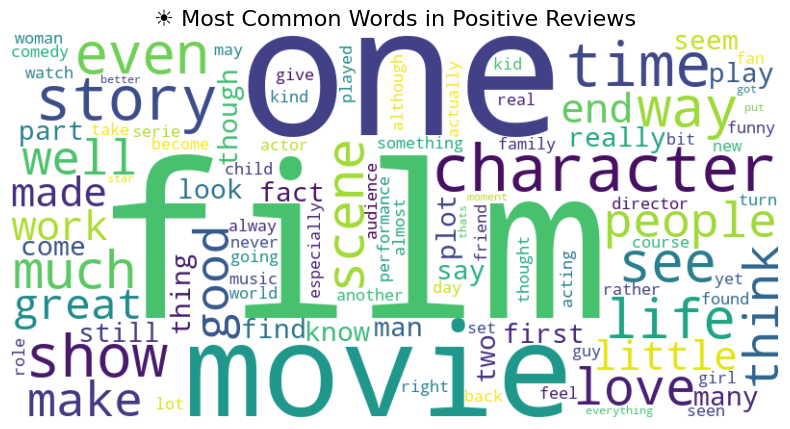

c:\sentiment analysis\sentiment_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


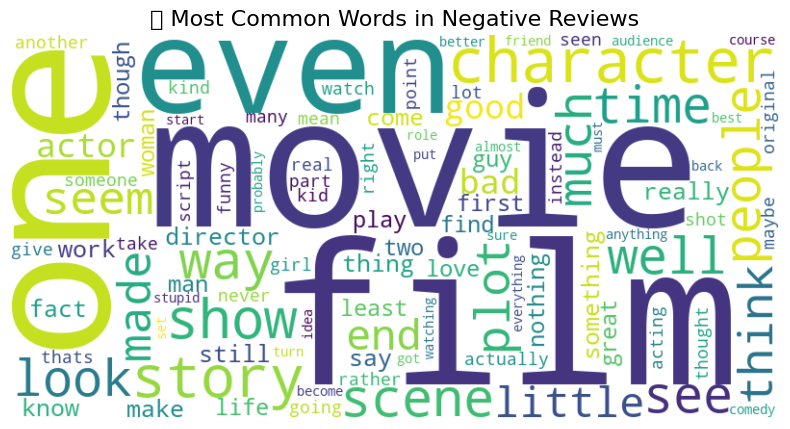

In [11]:
# WordCloud for Positive Reviews
positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
create_wordcloud(positive_text, '☀ Most Common Words in Positive Reviews')

# WordCloud for Negative Reviews
negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])
create_wordcloud(negative_text, '⛈ Most Common Words in Negative Reviews')

In [12]:
# Select only required columns
df_processed = df[['processed_review', 'sentiment']].copy()

# Save to CSV
df_processed.to_csv('../data/processed/processed_reviews.csv', index=False)

print("💾 Processed data saved to '../data/processed/processed_reviews.csv'")
print(f"✅ Ready for modeling with {len(df_processed)} samples")

💾 Processed data saved to '../data/processed/processed_reviews.csv'
✅ Ready for modeling with 50000 samples
